In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl

In [196]:
df = pd.read_csv("results.csv")
fpath = Path(mpl.get_data_path(), r'C:\Users\kauan\AppData\Local\Microsoft\Windows\Fonts\Montserrat-Regular.ttf')


In [ ]:
def plot_graphs_style(df, x_col, y_col, title, normal_value, 
                      font=None, 
                      specific_offsets=None, 
                      palette="#1c285c", 
                      show_legend=True):
    # Adicionando a reta de regressão
    x = df[x_col]
    y = df[y_col]
    coef = np.polyfit(x, y, 1)  # Coeficientes da regressão linear
    poly1d_fn = np.poly1d(coef)  # Função para a linha de regressão

    # Cálculo do R²
    y_pred = poly1d_fn(x)
    r_squared = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Configurações do gráfico
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Criar o scatterplot
    sns.scatterplot(data=df, x=x_col, y=y_col,s= 100, color=palette, legend=show_legend)

    # Adicionando o nome das ações
    texts = []
    for i in range(len(df)):
        ticker = df["Stock"].iloc[i][:-3] if df["Stock"].iloc[i][-3:] == ".SA" else df["Stock"].iloc[i]
        offset = specific_offsets.get(ticker, normal_value)
        texts.append(plt.text(df[x_col].iloc[i], 
                              df[y_col].iloc[i] + offset, 
                              ticker, 
                              fontsize=9, 
                              ha='center', 
                              va='center', 
                              font=font))

    # Adicionando a reta de regressão
    plt.plot(x, poly1d_fn(x), color="#e42e2e", label=rf"$R^2$ = {r_squared:.2f}")

    # Remover as bordas do gráfico (spines)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # Ajustes no gráfico
    if title != None:
        plt.title(title, fontsize=14, font=font, color="black")
    plt.xlabel(x_col, font=font, color="black")
    plt.ylabel(y_col, font=font, color="black")
    
    if show_legend:
        plt.legend(frameon=False)
        
    plt.grid(False)
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

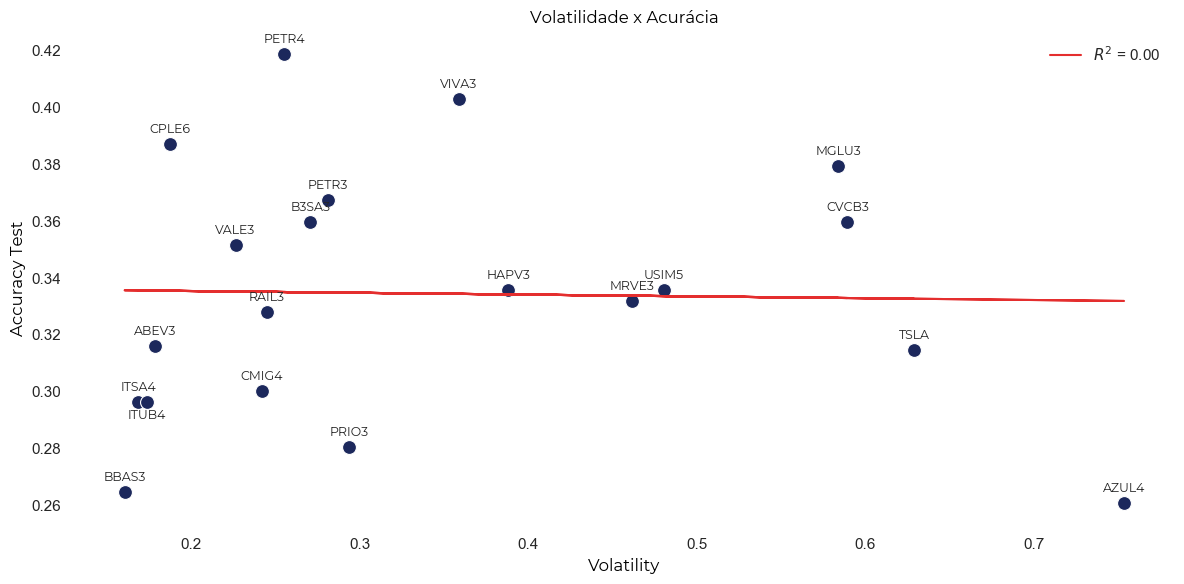

In [198]:
specific_offset = {"ITUB4": -0.005}
plot_graphs_style(df, "Volatility", "Accuracy Test","Volatilidade x Acurácia", 0.005, font=fpath, specific_offsets=specific_offset)

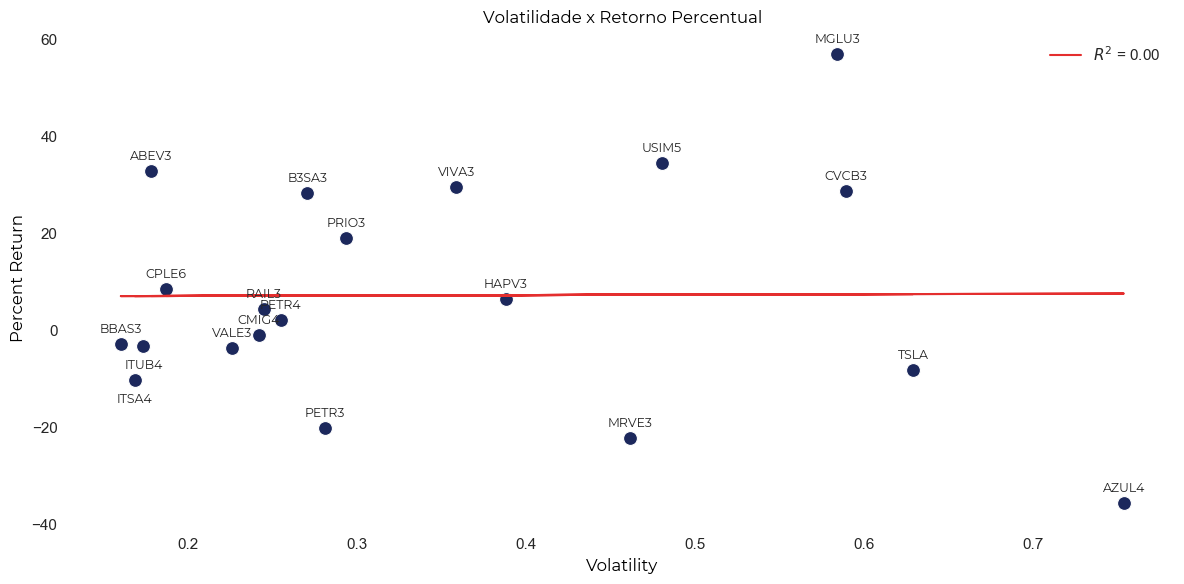

In [199]:
specific_offset = {"ITUB4": -4, "ITSA4":-4}
plot_graphs_style(df, "Volatility", "Percent Return","Volatilidade x Retorno Percentual", 3, font=fpath, specific_offsets=specific_offset)

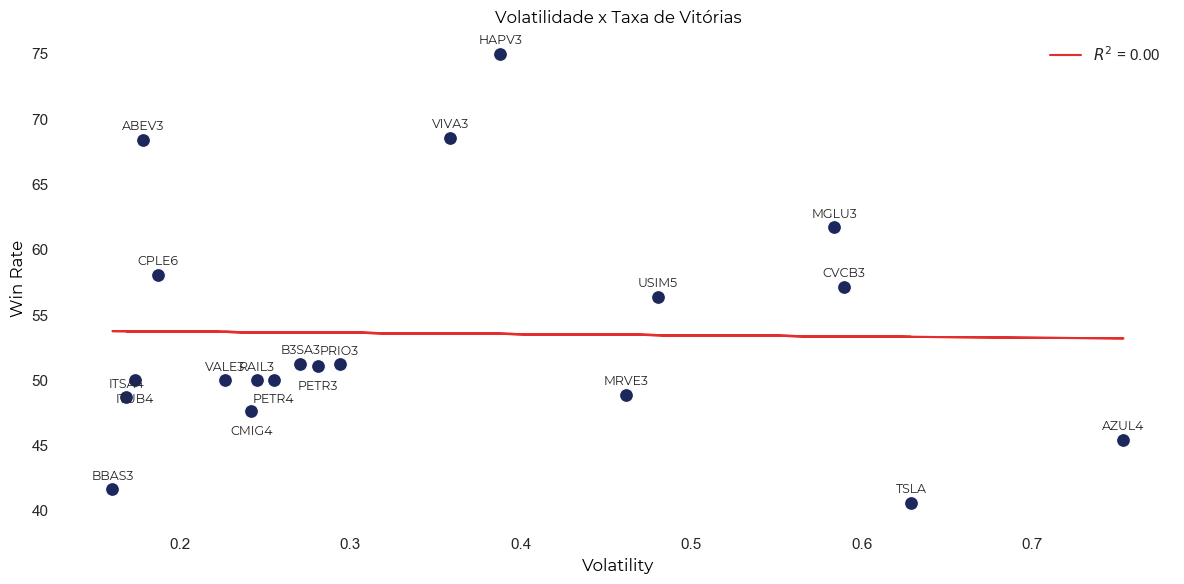

In [202]:
specific_offset = {"ITUB4": -1.5, "PETR4": -1.5, "PETR3": -1.5, "CMIG4": -1.5}
plot_graphs_style(df, "Volatility", "Win Rate","Volatilidade x Taxa de Vitórias", 1, font=fpath, specific_offsets=specific_offset)